In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0


## IMDB Movie reviews sentiment classification
Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative).   
  
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).   
For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
  
As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [2]:
imdb = keras.datasets.imdb

(trainx, trainy), (testx, testy) = imdb.load_data(num_words=10000)
print(trainx.shape)
print(testx.shape)

(25000,)
(25000,)


In [3]:
# in this data set, the number represet the index of each words in the review
print(trainx[0])
print("length = ",len(trainx[0]))
print("============================")
print(trainx[1])
print("length = ",len(trainx[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
length =  218
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,

In [4]:
word_index = imdb.get_word_index()

# reserved first 4 items for another usage
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

print(word_index["a"])

# create reverse mapping
inv_map = {v: k for k, v in word_index.items()}
print(inv_map[6])

6
a


In [5]:
def decode_sentence(sentence):
    return ' '.join( [ inv_map.get(ind, '?') for ind in sentence ] )

print(decode_sentence(trainx[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [6]:
# since the sentence were not in same length, 
# one way to handle this problem is make them same length
# for the value, to avoid mass up data, we will use <PAD>. 
# The index of PAD is 0, that's how & why it is 0.
train_data = keras.preprocessing.sequence.pad_sequences(trainx, maxlen=256, padding='post', value= word_index["<PAD>"])
print(train_data[0])

test_data = keras.preprocessing.sequence.pad_sequences(testx, maxlen=256, padding='post', value= word_index["<PAD>"])
print(test_data[0])

print("len = ", train_data.shape, "  ", test_data.shape)

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [7]:
vocab_size = 10000

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, 16),
    # the difference between GlobalAveragePolling1D is it average the value on pooling layer
    # while others may use max or min,etc.
    # the reason of pooling layer is 
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [9]:
# we seperate train data into train & validation to avoid using test data
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = trainy[:10000]
partial_y_train = trainy[10000:]

print(x_val.shape, " ", y_val.shape)
print(partial_x_train.shape, " ", partial_y_train.shape)

(10000, 256)   (10000,)
(15000, 256)   (15000,)


In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 71us/sample - loss: 0.6922 - acc: 0.5926 - val_loss: 0.6908 - val_acc: 0.5952
Epoch 2/40
15000/15000 [==============================] - 1s 37us/sample - loss: 0.6880 - acc: 0.6653 - val_loss: 0.6846 - val_acc: 0.7231
Epoch 3/40
15000/15000 [==============================] - 1s 36us/sample - loss: 0.6780 - acc: 0.7314 - val_loss: 0.6714 - val_acc: 0.7255
Epoch 4/40
15000/15000 [==============================] - 1s 35us/sample - loss: 0.6591 - acc: 0.7498 - val_loss: 0.6487 - val_acc: 0.7204
Epoch 5/40
15000/15000 [==============================] - 1s 35us/sample - loss: 0.6286 - acc: 0.7773 - val_loss: 0.6151 - val_acc: 0.7705
Epoch 6/40
15000/15000 [==============================] - 1s 36us/sample - loss: 0.5874 - acc: 0.8024 - val_loss: 0.5746 - val_acc: 0.8016
Epoch 7/40
15000/15000 [==============================] - 1s 35us/sa

In [11]:
result = model.evaluate(test_data, testy);
print(result)

25000/25000 [==============================] - 0s 19us/sample - loss: 0.3272 - acc: 0.8728
[0.3272118095302582, 0.87284]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


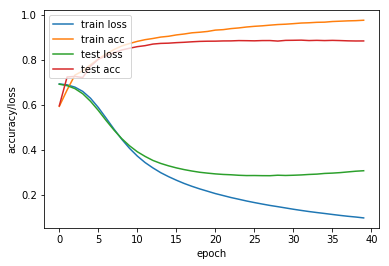

In [17]:
# start to visualize the history
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])

plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'train acc', 'test loss', 'test acc'], loc='upper left')
plt.show()